<a href="https://colab.research.google.com/github/jayanth142006/paddy-disease-classification/blob/main/crop_yield2_catboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/crop_yield.csv')
data.columns = data.columns.str.strip()
missing_values = data.isnull().sum()

# Print missing values for each column
print(missing_values)

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/crop_yield.csv')
data.head(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor, Pool

In [ ]:
df = data  # Replace with actual file name

# Drop the index column if it exists
if "index" in df.columns:
    df.drop(columns=["index"], inplace=True)

# 📌 Step 2: Define categorical columns
categorical_features = ["State", "Crop", "Season"]

# Convert categorical columns to categorical type
for col in categorical_features:
    df[col] = df[col].astype("category")

# 📌 Step 3: Define Features (X) and Target Variable (y)
X = df.drop(columns=["Yield"])
y = df["Yield"]

# 📌 Step 4: Split the dataset into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 5: Create a CatBoost Pool (Efficient Data Handling)
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_features)

In [ ]:
model = CatBoostRegressor(
    iterations=10000,        # Number of boosting iterations
    learning_rate=0.1,     # Step size shrinkage
    depth=8,               # Tree depth
    verbose=100            # Print training progress
)

In [ ]:
model.fit(train_pool)

0:	learn: 800.9735567	total: 32ms	remaining: 5m 20s
100:	learn: 60.3138913	total: 2.47s	remaining: 4m 2s
200:	learn: 38.5081697	total: 3.98s	remaining: 3m 13s
300:	learn: 26.3977475	total: 5.53s	remaining: 2m 58s
400:	learn: 18.5866776	total: 8.7s	remaining: 3m 28s
500:	learn: 13.9139703	total: 10.4s	remaining: 3m 17s
600:	learn: 10.5818120	total: 12s	remaining: 3m 7s
700:	learn: 8.7234721	total: 13.6s	remaining: 3m
800:	learn: 7.4556697	total: 15.2s	remaining: 2m 54s
900:	learn: 6.4197852	total: 16.8s	remaining: 2m 49s
1000:	learn: 5.6404048	total: 18.4s	remaining: 2m 45s
1100:	learn: 4.9538243	total: 21.2s	remaining: 2m 51s
1200:	learn: 4.3059227	total: 23.2s	remaining: 2m 50s
1300:	learn: 3.8355386	total: 24.8s	remaining: 2m 45s
1400:	learn: 3.3856673	total: 26.4s	remaining: 2m 41s
1500:	learn: 3.1120085	total: 28s	remaining: 2m 38s
1600:	learn: 2.8438943	total: 29.6s	remaining: 2m 35s
1700:	learn: 2.6257142	total: 31.2s	remaining: 2m 32s
1800:	learn: 2.4384228	total: 33.6s	remainin

In [ ]:
y_pred = model.predict(test_pool)

# 📌 Step 9: Evaluate the Model
# 📌 Step 9: Evaluate the Model
# Calculate RMSE without the 'squared' argument (for older scikit-learn versions)
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
rmse = np.sqrt(mse)  # Calculate Root Mean Squared Error manually

r2 = r2_score(y_test, y_pred)

print(f"🔹 RMSE: {rmse}")
print(f"🔹 R² Score: {r2}")

🔹 RMSE: 178.9634561930649
🔹 R² Score: 0.9600270530021151


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame

# Select only numeric features for correlation calculation
numeric_features = data.select_dtypes(include=np.number).columns
correlation_matrix = data[numeric_features].corr()

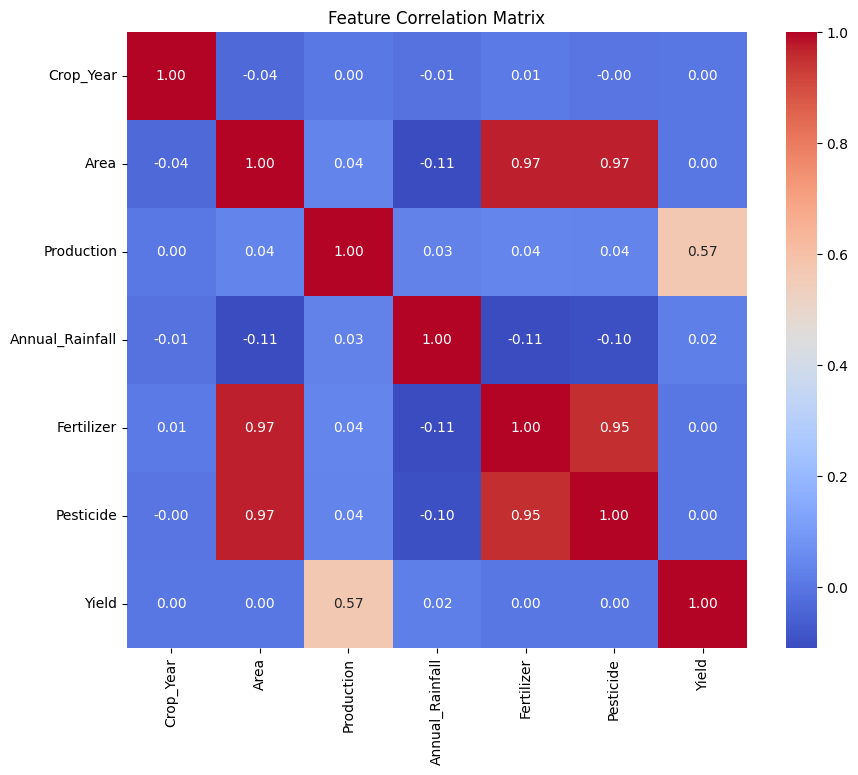

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()